In [ ]:
import cv2
import numpy as np
from scipy import ndimage
import math
import glob
import shutil
import pathlib
from google.colab.patches import cv2_imshow
import PIL
import matplotlib.pyplot as plt
import os, tarfile
import pandas as pd
from PIL import Image
import random
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Get and organize data

In [ ]:
#Download data from drive
dest_dir = "/content"
for file in glob.glob(r'/content/gdrive/MyDrive/Colab_Notebooks/Final_Project/Dataset/Leaf/train/leaf_net_20_v4.zip'):
    print(file)
    shutil.copy(file, dest_dir)

/content/gdrive/MyDrive/Colab_Notebooks/Final_Project/Dataset/Leaf/train/leaf_net_20_v4.zip


In [ ]:
current_path = pathlib.Path()
current_path

PosixPath('.')

In [ ]:
All_Images_path = current_path/'leaf_net_20_v4'
# All_Images_path.mkdir()

In [ ]:
!unzip -q /content/leaf_net_20_v4.zip -d /content

In [ ]:
all_Images_path = list(All_Images_path.glob('*/*')) # In computer programming, glob patterns specify sets of filenames with wildcard characters

In [ ]:
all_Images_path = [str(path) for path in all_Images_path]

In [ ]:
all_Images_path[0]

PosixPath('leaf_net_20_v4/cercis_canadensis/pi0014-01-4.jpg')

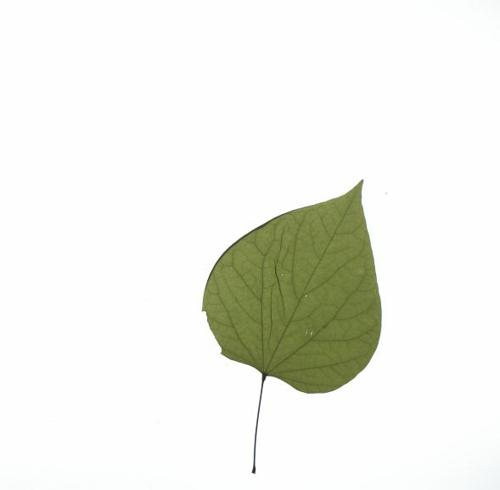

In [ ]:
img_check = cv2.imread(all_Images_path[200])
# print(img_check)
cv2_imshow(img_check)

In [ ]:
all_labels = list(map(lambda x : x.split('/')[-2],all_Images_path))

In [ ]:
label_names = sorted(item.name for item in All_Images_path.glob('*/') if item.is_dir())

In [ ]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'Fern': 0,
 'acer_negundo': 1,
 'acer_palmatum': 2,
 'aesculus_glabra': 3,
 'aesculus_pavi': 4,
 'asimina_triloba': 5,
 'catalpa_bignonioides': 6,
 'cercis_canadensis': 7,
 'chionanthus_virginicus': 8,
 'eucommia_ulmoides': 9,
 'gleditsia_triacanthos': 10,
 'lemon': 11,
 'palm': 12,
 'quercus_montana': 13,
 'quercus_muehlenbergii': 14,
 'quercus_stellata': 15,
 'quercus_velutina': 16,
 'snake_plant': 17,
 'tilia_americana': 18,
 'ulmus_glabra': 19}

## Preprocessing data

In [ ]:
from numpy.lib.type_check import imag
def get_images_df_from_source(data_source_path):
  """
  This function will return a dataframe with image path, width, height, and file size
  in given data source path
  """
  all_images = [str(x) for x in data_source_path.glob('*/*') if x.parent.name in label_names and x.is_file()]

  all_images_with_size = []
  count = 0
  label = []
  for image in all_images:

    fsize = os.path.getsize(image)
    im = Image.open(image)
    label = image.split('/')[-2]
    all_images_with_size.append([image, im.width, im.height, fsize, label])
    count += 1

    if(count % 100):
      print('Alreay computed {} images'.format(count))

  print('total images:', len(all_images_with_size))
  
  df = pd.DataFrame(all_images_with_size, columns=['filename', 'width', 'height', 'filesize','label'])
  
  return df

In [ ]:
df_source_images = get_images_df_from_source(All_Images_path)

Alreay computed 1 images
Alreay computed 2 images
Alreay computed 3 images
Alreay computed 4 images
Alreay computed 5 images
Alreay computed 6 images
Alreay computed 7 images
Alreay computed 8 images
Alreay computed 9 images
Alreay computed 10 images
Alreay computed 11 images
Alreay computed 12 images
Alreay computed 13 images
Alreay computed 14 images
Alreay computed 15 images
Alreay computed 16 images
Alreay computed 17 images
Alreay computed 18 images
Alreay computed 19 images
Alreay computed 20 images
Alreay computed 21 images
Alreay computed 22 images
Alreay computed 23 images
Alreay computed 24 images
Alreay computed 25 images
Alreay computed 26 images
Alreay computed 27 images
Alreay computed 28 images
Alreay computed 29 images
Alreay computed 30 images
Alreay computed 31 images
Alreay computed 32 images
Alreay computed 33 images
Alreay computed 34 images
Alreay computed 35 images
Alreay computed 36 images
Alreay computed 37 images
Alreay computed 38 images
Alreay computed 39 im

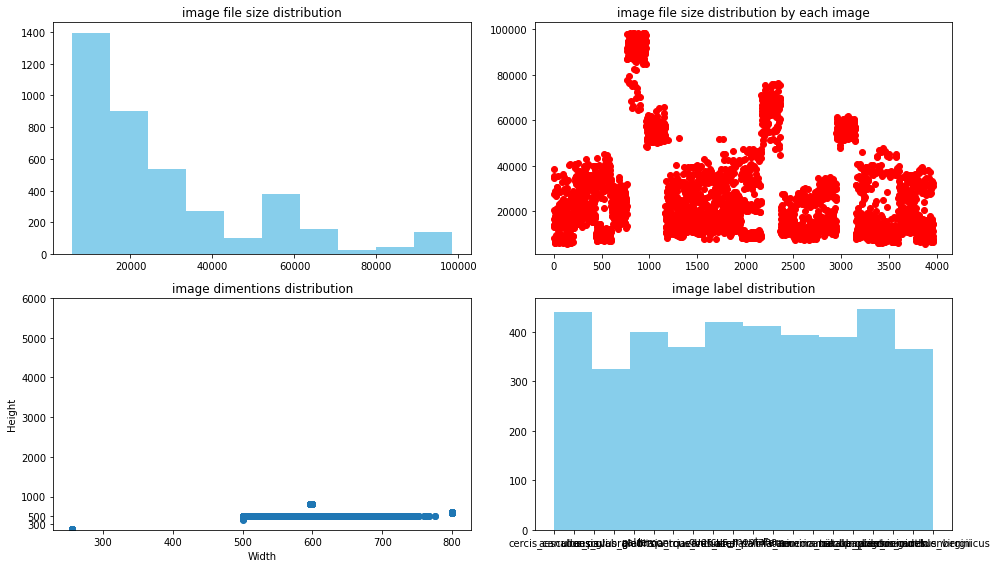

In [ ]:
fig, ax = plt.subplots(2, 2 , figsize=[14, 8])

ax[0,0].hist(df_source_images.filesize, color="skyblue")
ax[0,0].set_title('image file size distribution')

ax[0,1].plot(df_source_images.filesize, 'ro')
ax[0,1].set_title('image file size distribution by each image')

ax[1,0].scatter(df_source_images.width, df_source_images.height)
ax[1,0].set_title('image dimentions distribution')
ax[1,0].set_xlabel('Width')
ax[1,0].set_ylabel('Height')
ax[1,0].set_yticks([300, 500, 1000, 2000, 3000, 4000, 5000, 6000])

ax[1,1].hist(df_source_images.label, color="skyblue")
ax[1,1].set_title('image label distribution')
plt.tight_layout()
plt.show()

In [ ]:
def make_cont(img_path, to_gray=False, IMG_SIZE=224):
    """
    Increase image contract
    """
    img = cv2.imread(img_path)
    if to_gray:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    cimg = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), IMG_SIZE/10), -4,128)
    return cimg

In [ ]:
image_show = cv2.imread(all_Images_path[30])

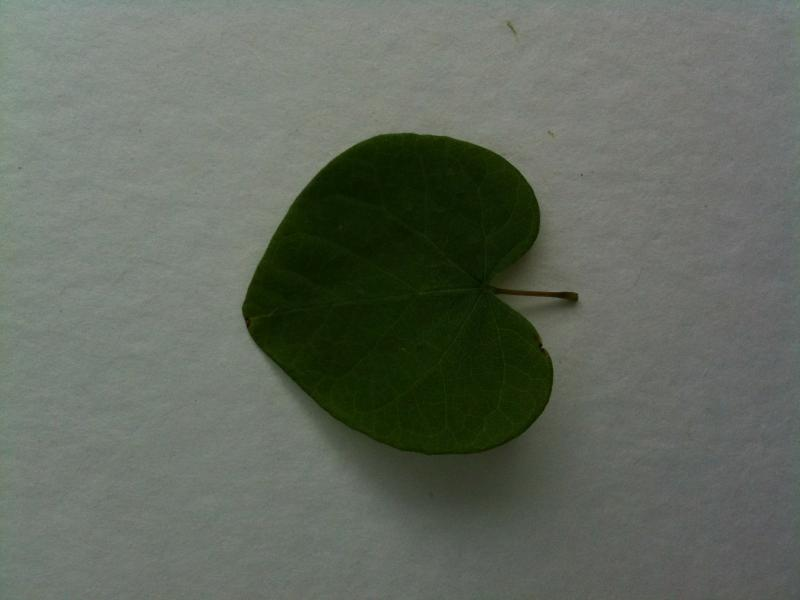

In [ ]:
cv2_imshow(image_show)

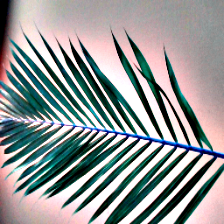

In [ ]:
cv2_imshow(make_cont(all_Images_path[820]))

In [ ]:
from albumentations import (
    Compose, HorizontalFlip, CLAHE, HueSaturationValue,
    RandomBrightness, RandomContrast, RandomGamma,OneOf,
    ToFloat, ShiftScaleRotate,GridDistortion, ElasticTransform, JpegCompression, HueSaturationValue,
    RGBShift, RandomBrightness, RandomContrast, Blur, MotionBlur, MedianBlur, GaussNoise,CenterCrop,
    IAAAdditiveGaussianNoise,GaussNoise,Cutout, Rotate, VerticalFlip,Transpose,OpticalDistortion
)

AUGMENT_TRAIN = Compose([
    HorizontalFlip(p=0.5),
    Rotate(limit=15, border_mode=0, p=0.5),
    VerticalFlip(p=0.5),
    RandomContrast(limit=0.01, p=0.5),
    RandomBrightness(limit=0.01, p=0.5),
], p=0.5)

In [ ]:
import tensorflow as tf
from tensorflow import nn
from tensorflow.keras import models, Model
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.applications import ResNet50,ResNet50V2,VGG16,VGG19,ResNet101V2,ResNet152V2, InceptionV3
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow import keras 

In [ ]:
def aug_fn(transforms,image):
    aug_data = transforms(image=image)['image']
    return aug_data

In [ ]:
class ImageDataGenerator(keras.utils.Sequence):
    def __init__(self,
                 train_fns,
                 labels,
                 augment=None,
                 batch_size=32,
                 img_size=224,
                 n_channels=3,
                 sigmaX=10,
                 normalize="normal",
                 add_mixup=False,
                 shuffle=False,
                 to_gray=False,
                 add_contrast=True,
                 return_label=True):
        self.batch_size = batch_size
        self.train_fns = train_fns
        self.labels = labels
        # fix-const
        self.img_indexes = range(len(self.train_fns))

        # metadata
        self.img_size = img_size
        self.n_channels = n_channels
        self.to_gray = to_gray
        if self.to_gray:
            self.n_channels = 1
        self.shuffle = shuffle
        self.normalize = normalize
        self.augment = augment
        self.return_label = return_label
        self.add_contrast = add_contrast
        self.add_mixup = add_mixup
        
        # hyperparams
        self.sigmaX = sigmaX
        
        # last call
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.train_fns) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]

        # Find list of IDs
        temp_img_indexes = [self.img_indexes[index] for index in indexes]

        # Generate data
        if self.return_label:
            X, y = self.__data_generation(temp_img_indexes)
            return X, y
        else:
            X = self.__data_generation(temp_img_indexes)
            return X

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.train_fns))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def normalize_img(self, img):
        img = img.astype(np.float32)

        mean = np.mean(img)
        std = np.std(img)

        if std > 0:
            img = (img - mean) / std
        else:
            img = img * 0.
        return img
            
    def __data_generation(self, img_indexes):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        X = np.empty(
            (self.batch_size, self.img_size, self.img_size, self.n_channels),
            dtype=np.float32
        )
        y = np.empty((self.batch_size), dtype=int)

        # Generate data
        for index, img_index in enumerate(img_indexes):
            
            img = cv2.imread(self.train_fns[img_index])
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            if self.augment is not None:
                img = aug_fn(self.augment, img)
            
            if self.to_gray:
                img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
            img = cv2.resize(img, (self.img_size, self.img_size))

            if self.add_contrast:
                img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0, 0), self.sigmaX), -4, 128)

            # normalize
            if self.normalize == "normal":
                img = img / 255
            elif self.normalize == "mean":
                img = self.normalize_img(img)
            else:
                img = img

            img = img.astype(np.float32)

            if self.to_gray and len(img.shape) != 3:
                img = np.expand_dims(img, axis=-1)
            X[index, ] = img
            y[index] = self.labels[img_index]
        
        y = tf.keras.utils.to_categorical(y, num_classes=20)
        
        if self.return_label:
            return X, y
        else:
            return X

In [ ]:
all_image_labels = [label_to_index[label]
                    for label in all_labels]

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_val, y_train, y_val = train_test_split(all_Images_path, all_image_labels, test_size=0.3)

print(X_train[10], y_train[10])

leaf_net_20_v4/acer_negundo/pi2029-09-4.jpg 1


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32
N_CHANNELS = 3

train_gen = ImageDataGenerator(
    X_train, y_train, n_channels=N_CHANNELS, img_size=IMG_SIZE, batch_size=BATCH_SIZE, normalize="not_normal",
    add_contrast=True, to_gray=False, shuffle=False, augment=AUGMENT_TRAIN
)
val_gen = ImageDataGenerator(
    X_val, y_val, n_channels=N_CHANNELS, img_size=IMG_SIZE, batch_size=BATCH_SIZE, normalize="not_normal",
    add_contrast=True, to_gray=False, shuffle=False, augment=None
)

In [ ]:
next(iter(train_gen))[0][0].shape

(224, 224, 3)

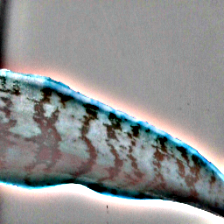

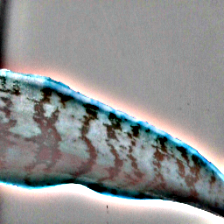

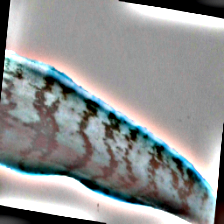

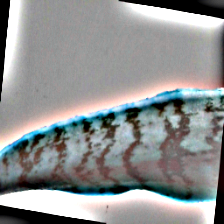

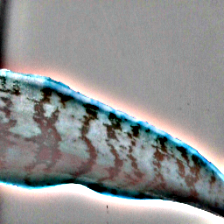

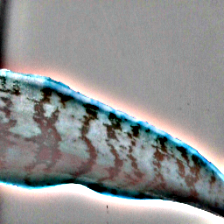

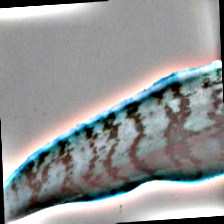

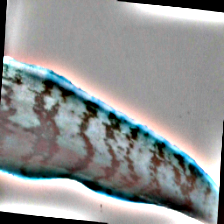

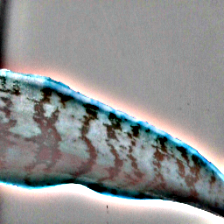

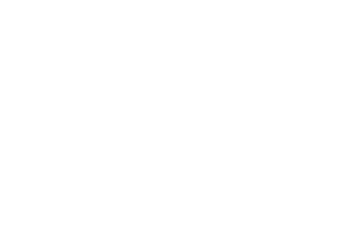

In [ ]:
for i in range(9):
#   augmented_image = random_invert(image)
  ax = plt.subplot(3, 3, i + 1)
  cv2_imshow(train_gen[11][0][0])
  plt.axis("off")

### Fine tuning with EfficientNetB4

In [ ]:
base_model_EfficientNet = keras.applications.EfficientNetB4(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

71696384/71686520 [==============================] - 2s 0us/step


In [ ]:
# Freeze the base model
base_model_EfficientNet.trainable=False

inputs = keras.Input(shape=(224, 224, 3))
# x = keras.applications.EfficientNet.preprocess_input(inputs)
x = base_model_EfficientNet(inputs,training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.BatchNormalization()(x)
outputs = keras.layers.Dense(20, activation='softmax')(x)
model_EfficientNet = keras.Model(inputs, outputs)

model_EfficientNet.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb4 (Functional)  (None, 7, 7, 1792)       17673823  
                                                                 
 global_average_pooling2d (G  (None, 1792)             0         
 lobalAveragePooling2D)                                          
                                                                 
 batch_normalization (BatchN  (None, 1792)             7168      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 20)                35860     
                                                                 
Total params: 17,716,851
Trainable params: 39,444
Non-trainab

In [ ]:
earlystopping_callback_EfficientNet = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    min_delta=1e-3,
    patience=5,
    verbose=1,
    restore_best_weights=True)

checkpoint_callback_EfficientNet = ModelCheckpoint(filepath="/content/gdrive/MyDrive/Colab_Notebooks/Final_Project/Dataset/Leaf/Model_EfficientNet_20_v4.h5",
                                      save_weights_only=False, # the whole model (False) or only weights (True) 
                                      save_best_only=True, # keep the best model with lowest validation loss
                                      monitor='val_loss',
                                      mode = 'min',
                                      verbose=1)

learning_rate_reduction_EfficientNet = ReduceLROnPlateau(monitor="val_loss", factor=0.5, mode="min", patience=3, verbose=2)

callbacks_list_EfficientNet = [
    checkpoint_callback_EfficientNet,
    earlystopping_callback_EfficientNet,
    learning_rate_reduction_EfficientNet]

In [ ]:
model_EfficientNet.compile(loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)

In [ ]:
# START TRAINING
init_epochs = 20

history_EfficientNet = model_EfficientNet.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=20,
    validation_data=val_gen,
    validation_steps=len(val_gen),
    callbacks=callbacks_list_EfficientNet
)

Epoch 1/20
86/86 [==============================] - ETA: 0s - loss: 0.7364 - accuracy: 0.7736
Epoch 00001: val_loss improved from inf to 0.76776, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Final_Project/Dataset/Leaf/Model_EfficientNet_20_v4.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


86/86 [==============================] - 79s 714ms/step - loss: 0.7364 - accuracy: 0.7736 - val_loss: 0.7678 - val_accuracy: 0.8961 - lr: 0.0010
Epoch 2/20
86/86 [==============================] - ETA: 0s - loss: 0.1763 - accuracy: 0.9488
Epoch 00002: val_loss improved from 0.76776 to 0.34020, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Final_Project/Dataset/Leaf/Model_EfficientNet_20_v4.h5
86/86 [==============================] - 60s 697ms/step - loss: 0.1763 - accuracy: 0.9488 - val_loss: 0.3402 - val_accuracy: 0.9367 - lr: 0.0010
Epoch 3/20
86/86 [==============================] - ETA: 0s - loss: 0.1198 - accuracy: 0.9637
Epoch 00003: val_loss improved from 0.34020 to 0.18523, saving model to /content/gdrive/MyDrive/Colab_Notebooks/Final_Project/Dataset/Leaf/Model_EfficientNet_20_v4.h5
86/86 [==============================] - 60s 698ms/step - loss: 0.1198 - accuracy: 0.9637 - val_loss: 0.1852 - val_accuracy: 0.9578 - lr: 0.0010
Epoch 4/20
86/86 [=========================

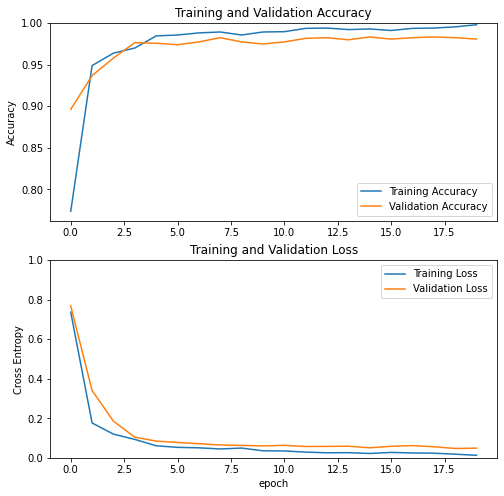

In [ ]:
acc = history_EfficientNet.history['accuracy']
val_acc = history_EfficientNet.history['val_accuracy']

loss = history_EfficientNet.history['loss']
val_loss = history_EfficientNet.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
restored_model = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab_Notebooks/Final_Project/Dataset/Leaf/Model_EfficientNet_20_v4.h5')

# We need to define its optimizer and loss function again since the h5 file
# does not contain those information :(
restored_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Model evaluation

In [ ]:
set(all_labels)

{'Fern',
 'acer_negundo',
 'acer_palmatum',
 'aesculus_glabra',
 'aesculus_pavi',
 'asimina_triloba',
 'catalpa_bignonioides',
 'cercis_canadensis',
 'chionanthus_virginicus',
 'eucommia_ulmoides',
 'gleditsia_triacanthos',
 'lemon',
 'palm',
 'quercus_montana',
 'quercus_muehlenbergii',
 'quercus_stellata',
 'quercus_velutina',
 'snake_plant',
 'tilia_americana',
 'ulmus_glabra'}

In [ ]:
predictions = restored_model.predict(val_gen)

In [ ]:
len(predictions)

1184

In [ ]:
pred_indices = np.argmax(predictions,axis=1)

In [ ]:
len(val_gen.labels)

1189

In [ ]:
ground_truth =val_gen.labels[0:1184]

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ground_truth, pred_indices, target_names=list(set(all_labels))))

                        precision    recall  f1-score   support

 quercus_muehlenbergii       1.00      1.00      1.00        59
     cercis_canadensis       0.90      1.00      0.95        55
          acer_negundo       0.99      1.00      0.99        66
         acer_palmatum       0.96      0.96      0.96        49
     eucommia_ulmoides       0.97      0.94      0.95        78
          ulmus_glabra       0.97      0.99      0.98        71
       tilia_americana       1.00      1.00      1.00        65
                  Fern       0.95      1.00      0.98        59
chionanthus_virginicus       0.98      0.95      0.96        57
           snake_plant       0.95      0.98      0.97        58
                  palm       1.00      0.95      0.97        57
      quercus_velutina       1.00      1.00      1.00        62
  catalpa_bignonioides       1.00      1.00      1.00        59
                 lemon       1.00      1.00      1.00        85
       quercus_montana       1.00      

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ground_truth, pred_indices, target_names=all_leaf_type))

                        precision    recall  f1-score   support

           Ladder_fern       1.00      1.00      1.00        59
          acer_negundo       0.90      1.00      0.95        55
         acer_palmatum       0.99      1.00      0.99        66
       aesculus_glabra       0.96      0.96      0.96        49
         aesculus_pavi       0.97      0.94      0.95        78
       asimina_triloba       0.97      0.99      0.98        71
  catalpa_bignonioides       1.00      1.00      1.00        65
     cercis_canadensis       0.95      1.00      0.98        59
chionanthus_virginicus       0.98      0.95      0.96        57
     eucommia_ulmoides       0.95      0.98      0.97        58
 gleditsia_triacanthos       1.00      0.95      0.97        57
        Laurus_nobilis       1.00      1.00      1.00        62
             Sago_palm       1.00      1.00      1.00        59
       quercus_montana       1.00      1.00      1.00        85
 quercus_muehlenbergii       1.00      

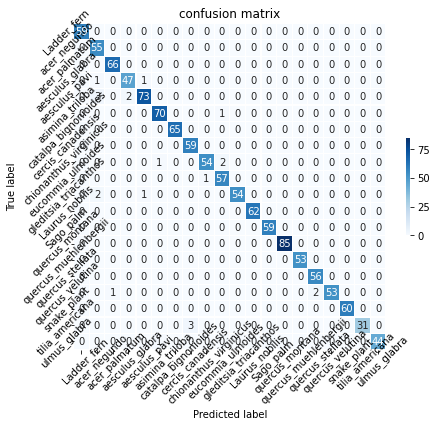

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
## plot confusion matrix
y_preds = pred_indices
y_trues = ground_truth
c_m = confusion_matrix(y_trues, y_preds)

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(c_m, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

ax.set(
    xticklabels=list(all_leaf_type),
    yticklabels=list(all_leaf_type),
    title='confusion matrix',
    ylabel='True label',
    xlabel='Predicted label'
)
params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
plt.show()

In [ ]:
all_leaf_type = list(leaf_type.keys())

In [ ]:
all_leaf_type

['Ladder_fern',
 'acer_negundo',
 'acer_palmatum',
 'aesculus_glabra',
 'aesculus_pavi',
 'asimina_triloba',
 'catalpa_bignonioides',
 'cercis_canadensis',
 'chionanthus_virginicus',
 'eucommia_ulmoides',
 'gleditsia_triacanthos',
 'Laurus_nobilis',
 'Sago_palm',
 'quercus_montana',
 'quercus_muehlenbergii',
 'quercus_stellata',
 'quercus_velutina',
 'snake_plant',
 'tilia_americana',
 'ulmus_glabra']

In [ ]:
leaf_type = {'Ladder_fern': 0,
 'acer_negundo': 1,
 'acer_palmatum': 2,
 'aesculus_glabra': 3,
 'aesculus_pavi': 4,
 'asimina_triloba': 5,
 'catalpa_bignonioides': 6,
 'cercis_canadensis': 7,
 'chionanthus_virginicus': 8,
 'eucommia_ulmoides': 9,
 'gleditsia_triacanthos': 10,
 'Laurus_nobilis': 11,
 'Sago_palm': 12,
 'quercus_montana': 13,
 'quercus_muehlenbergii': 14,
 'quercus_stellata': 15,
 'quercus_velutina': 16,
 'snake_plant': 17,
 'tilia_americana': 18,
 'ulmus_glabra': 19}

### Error Analysis

In [ ]:
label_to_index

{'Fern': 0,
 'acer_negundo': 1,
 'acer_palmatum': 2,
 'aesculus_glabra': 3,
 'aesculus_pavi': 4,
 'asimina_triloba': 5,
 'catalpa_bignonioides': 6,
 'cercis_canadensis': 7,
 'chionanthus_virginicus': 8,
 'eucommia_ulmoides': 9,
 'gleditsia_triacanthos': 10,
 'lemon': 11,
 'palm': 12,
 'quercus_montana': 13,
 'quercus_muehlenbergii': 14,
 'quercus_stellata': 15,
 'quercus_velutina': 16,
 'snake_plant': 17,
 'tilia_americana': 18,
 'ulmus_glabra': 19}

In [ ]:
# prediction_table is a dict with index, prediction, ground truth
prediction_table = {}
for index, val in enumerate(predictions):
    # get argmax index
    index_of_highest_probability = np.argmax(val)
    value_of_highest_probability = val[index_of_highest_probability]
    prediction_table[index] = [value_of_highest_probability, 
                               index_of_highest_probability, 
                               ground_truth[index]]
assert len(predictions) == len(ground_truth) == len(prediction_table)

In [ ]:
def get_images_with_sorted_probabilities(prediction_table,
                                         get_highest_probability,
                                         label,
                                         number_of_items,
                                         only_false_predictions=False):
    sorted_prediction_table = [(k, prediction_table[k])
                               for k in sorted(prediction_table,
                                               key=prediction_table.get,
                                               reverse=get_highest_probability)
                               ]
    result = []
    for index, key in enumerate(sorted_prediction_table):
        image_index, [probability, predicted_index, gt] = key
        if predicted_index == label:
            if only_false_predictions == True:
                if predicted_index != gt:
                    result.append(
                        [image_index, [probability, predicted_index, gt]])
            else:
                result.append(
                    [image_index, [probability, predicted_index, gt]])
    return result[:number_of_items]

def plot_images(filenames, distances, message):
    images = []
    for filename in filenames:
        images.append(mpimg.imread(filename))
    plt.figure(figsize=(20, 15))
    columns = 5
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title("\n\n" + filenames[i].split("/")[-1] + "\n" +
                     "\nProbability: " +
                     str(float("{0:.2f}".format(distances[i]))))
        plt.suptitle(message, fontsize=20, fontweight='bold')
        plt.axis('off')
        plt.imshow(image)
        
def display(sorted_indices, message):
    similar_image_paths = []
    distances = []
    for name, value in sorted_indices:
        [probability, predicted_index, gt] = value
        similar_image_paths.append(str(All_Images_path) + '/' + filenames[name])
        distances.append(probability)
    plot_images(similar_image_paths, distances, message)

In [ ]:
filenames= [k.strip('leaf_net_20_v4') for k in X_val]

In [ ]:
filenames

['/ulmus_glabra/ny1075-01-2.jpg',
 '/eucommia_ulmoides/12992000821473.jpg',
 '/quercus_stellata/wb1215-07-3.jpg',
 '/catalpa_bignonioides/13001269157936.jpg',
 '/catalpa_bignonioides/pi2783-05-4.jpg',
 '/asimina_triloba/13001240197914.jpg',
 '/gleditsia_triacanthos/pi2767-05-2.jpg',
 '/aesculus_glabra/ny1158-01-1.jpg',
 '/acer_negundo/pi2028-02-3.jpg',
 '/chionanthus_virginicus/pi2217-01-4.jpg',
 '/lemon/131.png',
 '/quercus_muehlenbergii/13292245047861.jpg',
 '/aesculus_glabra/ny1160-04-1.jpg',
 '/quercus_stellata/wb1214-02-4.jpg',
 '/quercus_montana/13292231175094.jpg',
 '/cercis_canadensis/pi0001-09-1.jpg',
 '/ulmus_glabra/ny1074-08-2.jpg',
 '/quercus_montana/13292231172679.jpg',
 '/catalpa_bignonioides/pi2788-06-1.jpg',
 '/quercus_stellata/wb1215-04-4.jpg',
 '/lemon/4.png',
 '/palm/23.png',
 '/gleditsia_triacanthos/pi2769-01-4.jpg',
 '/gleditsia_triacanthos/pi2769-11-1.jpg',
 '/aesculus_pavi/ny1021-02-3.jpg',
 '/quercus_montana/pi0039-03-4.jpg',
 '/quercus_velutina/wb1445-10-4.jpg'

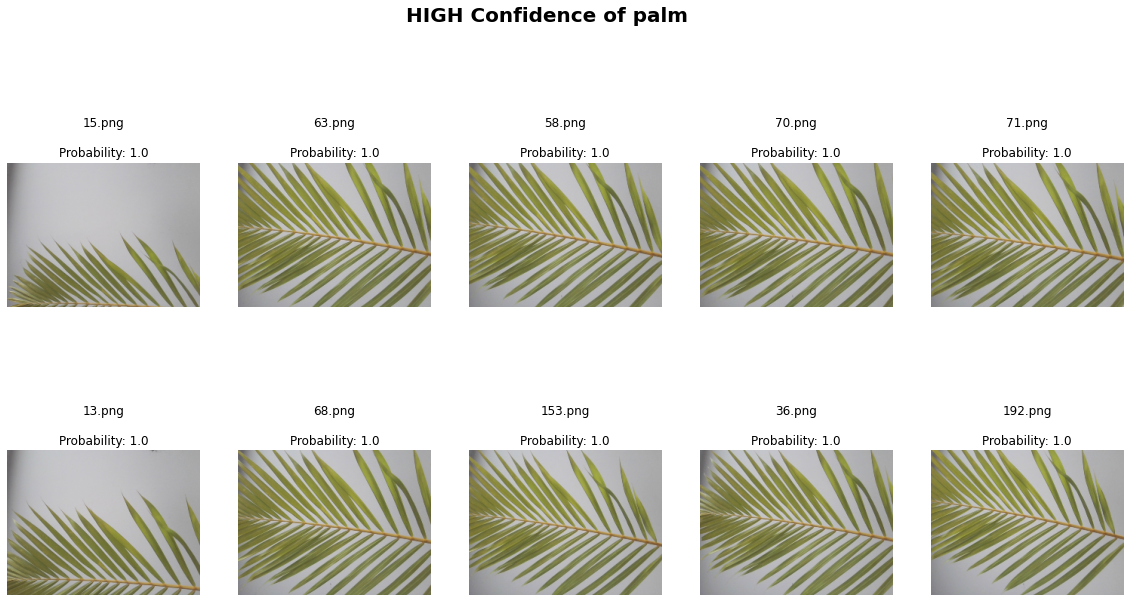

In [ ]:
message = 'HIGH Confidence of palm'
highest_confident_palm_images = get_images_with_sorted_probabilities(prediction_table, True, 12, 10, False)
display(highest_confident_palm_images, message)

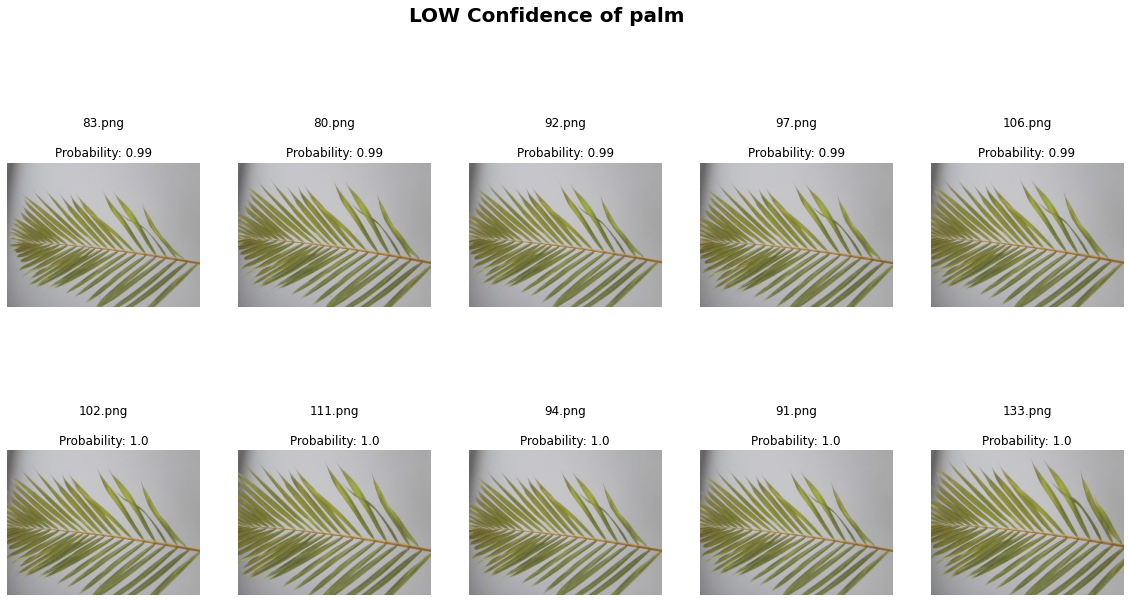

In [ ]:
message = 'LOW Confidence of palm'
lowest_confident_palm_images = get_images_with_sorted_probabilities(prediction_table, False, 12, 10, False)
display(lowest_confident_palm_images, message)